### **Proceture**

- Understaning the problem
- importing the libraries
- importing the dataset
- Data Preprocessing
    - data cleaning
        - finding missing values, duplicaes, outliers
        - handling missing values, duplicates, outliers
    - Feature Engineering
- Data Visualization
    - Univertiate Analysis+ Bivariate Analysis+ Multivariate Analysis

- Feature Selection
    - Correlation
    - Feature importance
 
- Model Building
    - Splitting the dataset into train and test
    - Building the model
    - Training the model
    - Testing the model
    - Evaluating the model
    - Hyperparameter tuning
    - Cross validation
    - Model saving
    - Model deployment
    
- summary & conclusion  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
# df = pd.read_csv('data.csv') pd.read_excel('data.xlsx'), pd.read_json('data.json'), pd.read_sql('data.db')
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
data.shape # dimensions of the data

(344, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [7]:
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [8]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('-------------------')

species
['Adelie' 'Chinstrap' 'Gentoo']
-------------------
island
['Torgersen' 'Biscoe' 'Dream']
-------------------
bill_length_mm
[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
-------------------
bill_dept

In [9]:
# data cleaning
# check for missing values
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [21]:
df = data.copy()

In [22]:
missing_data = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in missing_data:
   df[col].fillna(df[col].mean(), inplace=True)
    
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [26]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [27]:
# Data Visualization

In [30]:
num = df.select_dtypes(include=['int', 'float']).columns
cat = df.select_dtypes(exclude=['int', 'float']).columns
print(num, cat)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object') Index(['species', 'island', 'sex'], dtype='object')


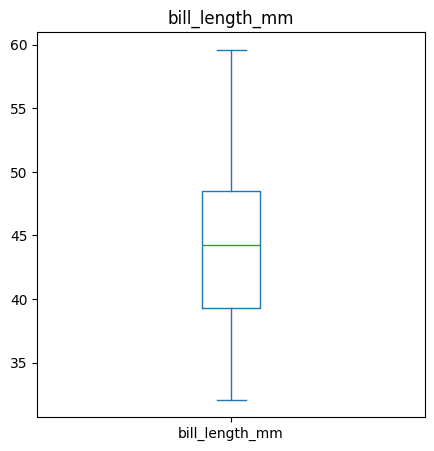

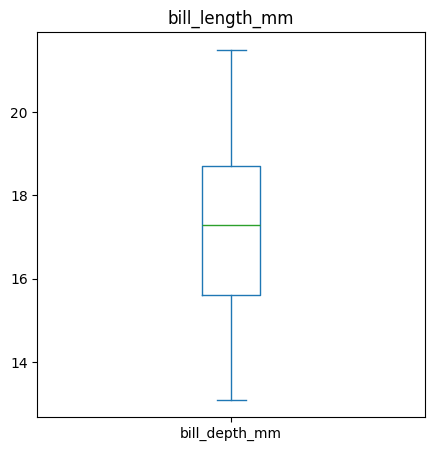

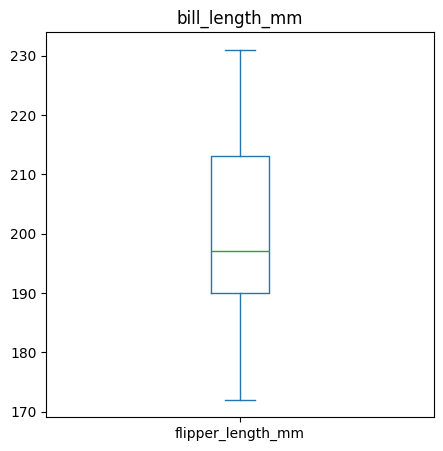

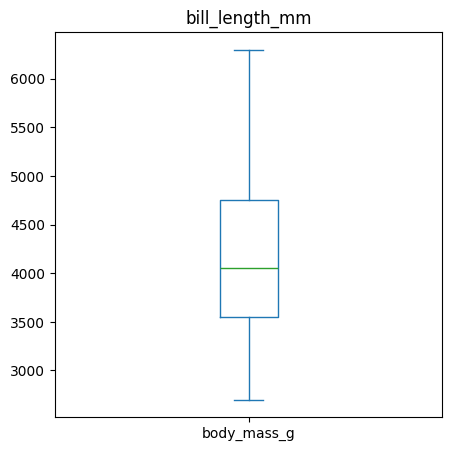

In [31]:
for col in num:
    plt.figure(figsize=(5, 5))
    df[col].plot(kind='box')
    plt.title(i)
    plt.show()

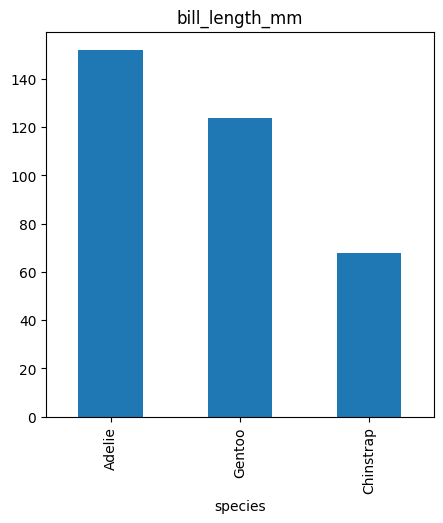

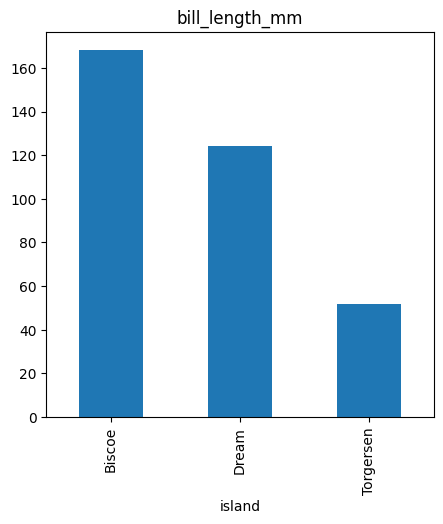

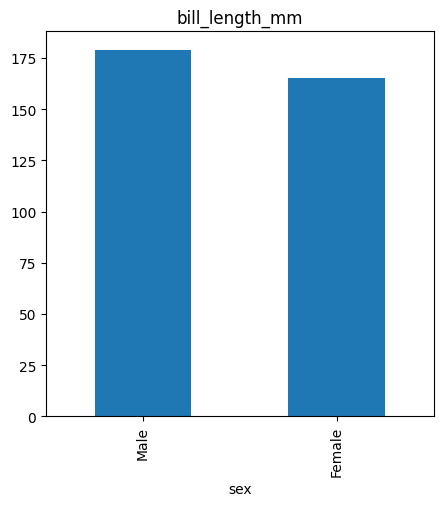

In [32]:
for col in cat:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

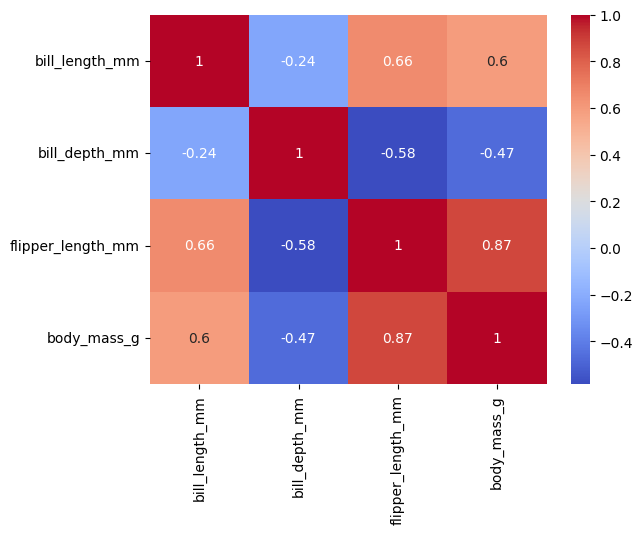

In [35]:
corr = df[num].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()